In [1]:
import pandas as pd

In [2]:
df = pd.read_stata('karlan_list_2007.dta')

In [3]:
df.describe()

,treatment,control,ratio2,ratio3,size25,size50,size100,sizeno,askd1,askd2,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
count,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,...,49978.000000,49978.000000,48217.000000,48047.000000,48217.000000,48221.000000,48209.000000,48214.000000,48215.000000,48217.000000
mean,0.666813,0.333187,0.222311,0.222211,0.166723,0.166623,0.166723,0.166743,0.222311,0.222291,...,0.510245,0.488715,0.819599,0.086710,0.321694,2.429012,54815.700533,0.669418,0.391661,0.871968
std,0.471357,0.471357,0.415803,0.415736,0.372732,0.372643,0.372732,0.372750,0.415803,0.415790,...,0.499900,0.499878,0.168561,0.135868,0.103039,0.378115,22027.316665,0.193405,0.186599,0.258654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009418,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.755845,0.014729,0.258311,2.210000,39181.000000,0.560222,0.235647,0.884929
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.872797,0.036554,0.305534,2.440000,50673.000000,0.712296,0.373744,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.938827,0.090882,0.369132,2.660000,66005.000000,0.816798,0.530036,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.989622,0.997544,5.270000,200001.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50083 entries, 0 to 50082
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   treatment           50083 non-null  int8    
 1   control             50083 non-null  int8    
 2   ratio               50083 non-null  category
 3   ratio2              50083 non-null  int8    
 4   ratio3              50083 non-null  int8    
 5   size                50083 non-null  category
 6   size25              50083 non-null  int8    
 7   size50              50083 non-null  int8    
 8   size100             50083 non-null  int8    
 9   sizeno              50083 non-null  int8    
 10  ask                 50083 non-null  category
 11  askd1               50083 non-null  int8    
 12  askd2               50083 non-null  int8    
 13  askd3               50083 non-null  int8    
 14  ask1                50083 non-null  int16   
 15  ask2                50083 non-null  

In [7]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Separate data into treatment and control groups
treatment_group = df[df['treatment'] == 1]
control_group = df[df['control'] == 1]

# T-test: mrm2 (months since last donation)
ttest_result = stats.ttest_ind(treatment_group['mrm2'].dropna(), control_group['mrm2'].dropna(), equal_var=False)

# Linear regression: mrm2 ~ treatment
df_reg = df[['mrm2', 'treatment']].dropna()
reg_result = smf.ols('mrm2 ~ treatment', data=df_reg).fit()
ttest_result, reg_result.summary()


(TtestResult(statistic=0.11953155228177251, pvalue=0.9048549631450832, df=33394.47581389535),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   mrm2   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                 -0.000
 Method:                 Least Squares   F-statistic:                   0.01428
 Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.905
 Time:                        15:29:10   Log-Likelihood:            -1.9585e+05
 No. Observations:               50082   AIC:                         3.917e+05
 Df Residuals:                   50080   BIC:                         3.917e+05
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t| 

# Experimental Results

### Charitable Contribution Made

First, I analyze whether matched donations lead to an increased response rate of making a donation. 

_todo: make a barplot with two bars. Each bar is the proportion of people who donated. One bar for treatment and one bar for control._

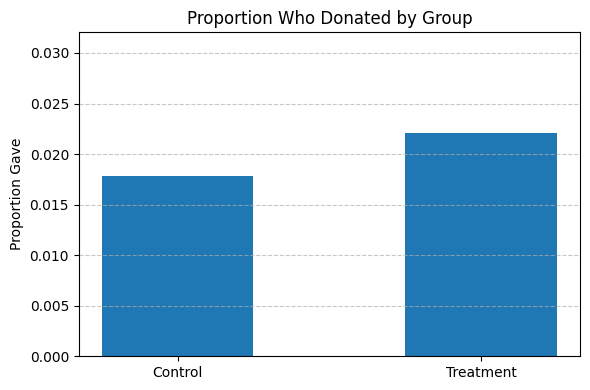

In [8]:
import matplotlib.pyplot as plt
gave_by_group = df.groupby("treatment")["gave"].mean().reset_index()
gave_by_group["group"] = gave_by_group["treatment"].map({0: "Control", 1: "Treatment"})

plt.figure(figsize=(6, 4))
plt.bar(gave_by_group["group"], gave_by_group["gave"], width=0.5)
plt.title("Proportion Who Donated by Group")
plt.ylabel("Proportion Gave")
plt.ylim(0, gave_by_group["gave"].max() + 0.01)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

_todo: run a t-test between the treatment and control groups on the binary outcome of whether any charitable donation was made. Also run a bivariate linear regression that demonstrates the same finding. (It may help to confirm your calculations match Table 2a Panel A.) Report your statistical results and interpret them in the context of the experiment (e.g., if you found a difference with a small p-value or that was statistically significant at some threshold, what have you learned about human behavior? Use mostly English words, not numbers or stats, to explain your finding.)_

In [9]:
# Re-import libraries and reload data due to kernel reset
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

# Load data
df = pd.read_stata("karlan_list_2007.dta")

# Ensure binary outcome is correctly typed
df['gave'] = df['gave'].astype(int)

# T-test: response rate (gave) between treatment and control groups
gave_treat = df[df['treatment'] == 1]['gave']
gave_control = df[df['control'] == 1]['gave']
t_stat, p_val = ttest_ind(gave_treat, gave_control, equal_var=False)

# Regression: response as a function of treatment
reg_gave = smf.ols('gave ~ treatment', data=df).fit()

t_stat, p_val, reg_gave.summary()


(3.2094621908279835,
 0.0013309823450914173,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   gave   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                  0.000
 Method:                 Least Squares   F-statistic:                     9.618
 Date:                Wed, 23 Apr 2025   Prob (F-statistic):            0.00193
 Time:                        21:04:50   Log-Likelihood:                 26630.
 No. Observations:               50083   AIC:                        -5.326e+04
 Df Residuals:                   50081   BIC:                        -5.324e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------

In [10]:
import statsmodels.api as sm

# Prepare the variables
X = sm.add_constant(df["treatment"])
y = df["gave"]

# Run the Probit regression
probit_model = sm.Probit(y, X)
probit_results = probit_model.fit()

probit_results.summary()


Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        21:22:42   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.028      3.113      0.002       0.032       0.141
==============================================================================
"""

In [11]:
# Subset the data for different match ratios
# According to the dataset: ratio = '1', '2', '3' for 1:1, 2:1, 3:1
df_ratio = df[df["treatment"] == 1].copy()
df_ratio["ratio"] = df_ratio["ratio"].astype(str)

# Extract binary 'gave' for each match ratio group
gave_1_1 = df_ratio[df_ratio["ratio"] == "1"]["gave"]
gave_2_1 = df_ratio[df_ratio["ratio"] == "2"]["gave"]
gave_3_1 = df_ratio[df_ratio["ratio"] == "3"]["gave"]

# Perform t-tests between match ratio groups
ttest_1_vs_2 = ttest_ind(gave_1_1, gave_2_1, equal_var=False)
ttest_1_vs_3 = ttest_ind(gave_1_1, gave_3_1, equal_var=False)
ttest_2_vs_3 = ttest_ind(gave_2_1, gave_3_1, equal_var=False)

ttest_1_vs_2, ttest_1_vs_3, ttest_2_vs_3


(TtestResult(statistic=-0.965048975142932, pvalue=0.33453078237183076, df=22225.07770983836),
 TtestResult(statistic=-1.0150174470156275, pvalue=0.31010856527625774, df=22215.0529778684),
 TtestResult(statistic=-0.05011581369764474, pvalue=0.9600305476940865, df=22260.84918918778))

In [12]:
# Ensure 'gave' is binary
df['gave'] = df['gave'].astype(int)

# Create dummy variables for each match ratio
# This is only for treatment group, so filter and prepare accordingly
df_ratio = df[df['treatment'] == 1].copy()
df_ratio['ratio'] = df_ratio['ratio'].astype(str)

# Create dummy variables: ratio1, ratio2, ratio3
df_ratio['ratio1'] = (df_ratio['ratio'] == '1').astype(int)
df_ratio['ratio2'] = (df_ratio['ratio'] == '2').astype(int)
df_ratio['ratio3'] = (df_ratio['ratio'] == '3').astype(int)

# Regression: gave ~ ratio1 + ratio2 + ratio3 (no intercept)
import statsmodels.api as sm

X = df_ratio[['ratio1', 'ratio2', 'ratio3']]
y = df_ratio['gave']
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6454
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.524
Time:                        21:40:37   Log-Likelihood:                 16688.
No. Observations:               33396   AIC:                        -3.337e+04
Df Residuals:                   33393   BIC:                        -3.334e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ratio1         0.0207      0.001     14.912      0.000       0.018       0.023
ratio2         0.0226      0.001     16.267      0.000       0.020       0.025
ratio3         0.0227      0.001     16.335      0.000       0.020       0.025
==============================================================================
Omnibus:                    38963.957   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2506478.937
Skew:                           6.511   Prob(JB):                         0.00
Kurtosis:                      43.394   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""